In [37]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

In [38]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) # Notice here
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [39]:
random_state=1515

In [3]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split

In [48]:
def dataset(file_name):
   # with soundfile.SoundFile(file_name) as sound_file:
       # X = sound_file.read(dtype="float32", start = 0, stop = )
        X= librosa.load(file_name, duration = 1.25)
        result=np.array([])     
        result=np.hstack(X)
        return result

In [49]:
#Load the data and SAVE IT each sound file

x,y=[],[]
for file in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/*/*.wav"):
    file_name=os.path.basename(file)
    L=file_name.split('_')
    if L[2]=='angry.wav':
      e='neg'
      D=dataset(file)
      x.append(D)
      y.append(e)
    if L[2]=='fear.wav':
      e='neg'
      D=dataset(file)
      x.append(D)
      y.append(e)
    if L[2]=='happy.wav':
      e='pos'
      D=dataset(file)
      x.append(D)
      y.append(e)
    if L[2]=='ps.wav':
      e='pos'     
      D=dataset(file)
      x.append(D)
      y.append(e)
    else:
        continue 

In [10]:
data = pd.DataFrame(y, columns =['emo'])
data

,emo
0,0.000200
1,-0.000006
2,0.000172
3,0.000119
4,0.000135
...,...
52372,-0.000475
52373,-0.000231
52374,0.000117
52375,0.000445


In [59]:
data = pd.DataFrame(x)
data['labels'] = y
data

,0,1,2,3,4,5,6,7,8,9,...,27555,27556,27557,27558,27559,27560,27561,27562,27563,labels
0,-0.000010,-0.000191,-0.000286,-0.000214,-0.000238,-0.000131,-0.000156,-0.000270,-0.000325,-0.000417,...,0.064037,0.057971,0.044378,0.021068,-0.000743,-0.021837,-0.039628,0.0,22050.0,neg
1,-0.000008,-0.000088,-0.000106,-0.000208,-0.000194,-0.000212,-0.000238,-0.000202,-0.000178,-0.000131,...,-0.000855,-0.026286,-0.036938,-0.046263,-0.055129,-0.054392,-0.054671,0.0,22050.0,neg
2,-0.000004,0.000042,0.000046,0.000058,0.000125,0.000067,0.000072,0.000148,0.000076,0.000061,...,0.012309,0.017665,0.033124,0.041953,0.037221,0.037272,0.037033,0.0,22050.0,neg
3,0.000008,-0.000181,-0.000097,-0.000084,-0.000100,-0.000069,-0.000081,-0.000054,-0.000086,-0.000020,...,-0.031264,-0.026517,-0.018977,-0.011455,-0.004194,0.002879,0.006669,0.0,22050.0,neg
4,-0.000016,-0.000008,-0.000092,-0.000350,-0.000496,-0.000496,-0.000272,-0.000101,-0.000323,-0.000821,...,0.012704,0.010078,0.009652,0.008262,0.004948,0.002727,0.000177,0.0,22050.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.000132,-0.000011,-0.000217,-0.000238,-0.000330,-0.000458,-0.000715,-0.000726,-0.001044,-0.000400,...,-0.069503,-0.061016,-0.057917,-0.025802,0.015829,0.035091,0.050101,0.0,22050.0,pos
1596,-0.000159,0.000147,0.000327,0.000558,0.000342,0.000600,0.000684,0.000398,0.000851,0.000494,...,-0.020570,-0.018206,-0.019545,-0.022411,-0.017155,-0.011005,-0.007053,0.0,22050.0,pos
1597,-0.000065,0.000893,0.001035,0.000751,0.000594,0.000182,0.000767,0.000702,0.000624,0.000810,...,0.005892,0.009174,0.012000,0.012395,0.012445,0.011902,0.012292,0.0,22050.0,pos
1598,-0.000118,0.000160,0.000384,0.000557,0.000665,0.001135,0.001260,0.000980,0.001138,0.000678,...,0.018781,0.010671,-0.009362,-0.003119,0.010446,0.032324,0.045311,0.0,22050.0,pos


In [60]:
data = data.drop(27563, axis = 1)
data

,0,1,2,3,4,5,6,7,8,9,...,27554,27555,27556,27557,27558,27559,27560,27561,27562,labels
0,-0.000010,-0.000191,-0.000286,-0.000214,-0.000238,-0.000131,-0.000156,-0.000270,-0.000325,-0.000417,...,0.061760,0.064037,0.057971,0.044378,0.021068,-0.000743,-0.021837,-0.039628,0.0,neg
1,-0.000008,-0.000088,-0.000106,-0.000208,-0.000194,-0.000212,-0.000238,-0.000202,-0.000178,-0.000131,...,0.015743,-0.000855,-0.026286,-0.036938,-0.046263,-0.055129,-0.054392,-0.054671,0.0,neg
2,-0.000004,0.000042,0.000046,0.000058,0.000125,0.000067,0.000072,0.000148,0.000076,0.000061,...,0.014724,0.012309,0.017665,0.033124,0.041953,0.037221,0.037272,0.037033,0.0,neg
3,0.000008,-0.000181,-0.000097,-0.000084,-0.000100,-0.000069,-0.000081,-0.000054,-0.000086,-0.000020,...,-0.032905,-0.031264,-0.026517,-0.018977,-0.011455,-0.004194,0.002879,0.006669,0.0,neg
4,-0.000016,-0.000008,-0.000092,-0.000350,-0.000496,-0.000496,-0.000272,-0.000101,-0.000323,-0.000821,...,0.016801,0.012704,0.010078,0.009652,0.008262,0.004948,0.002727,0.000177,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.000132,-0.000011,-0.000217,-0.000238,-0.000330,-0.000458,-0.000715,-0.000726,-0.001044,-0.000400,...,-0.071386,-0.069503,-0.061016,-0.057917,-0.025802,0.015829,0.035091,0.050101,0.0,pos
1596,-0.000159,0.000147,0.000327,0.000558,0.000342,0.000600,0.000684,0.000398,0.000851,0.000494,...,-0.025237,-0.020570,-0.018206,-0.019545,-0.022411,-0.017155,-0.011005,-0.007053,0.0,pos
1597,-0.000065,0.000893,0.001035,0.000751,0.000594,0.000182,0.000767,0.000702,0.000624,0.000810,...,0.007326,0.005892,0.009174,0.012000,0.012395,0.012445,0.011902,0.012292,0.0,pos
1598,-0.000118,0.000160,0.000384,0.000557,0.000665,0.001135,0.001260,0.000980,0.001138,0.000678,...,0.013083,0.018781,0.010671,-0.009362,-0.003119,0.010446,0.032324,0.045311,0.0,pos


In [4]:
import soundfile
ln = []
for file in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/*/*.wav"):
         y, sr = librosa.load(file)
         ln.append(librosa.get_duration(y))    

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.0417719e-05 -1.9059131e-04 -2.8630142e-04 ...  1.6136018e-04
  1.0805293e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.63047865e-06 -8.83409084e-05 -1.05965475e-04 ...  2.37700078e-04
  1.59660660e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.8700064e-06  4.2080985e-05  4.6381530e-05 ... -1.4604805e-03
 -1.2314213e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.26070755e-06 -1.80595554e-04 -9.71959453e-05 ... -1.38643009e-04
 -1.1080

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.1133951e-07 -1.3548363e-04 -1.3464283e-04 ... -1.3457780e-04
 -1.4611195e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00011503 -0.00123858 -0.00290292 ...  0.00114537  0.00052431
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.6573433e-06 -1.3028606e-04 -1.4619967e-04 ...  2.5479455e-04
  1.4807680e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[1.5693427e-05 2.2852514e-04 6.9471746e-04 ... 1.3693100e-04 3.9865790e-04
 0.0000000e+00] as keyword

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00011692  0.00135947 -0.00327157 ...  0.00203497  0.00157269
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[1.6893499e-06 3.1490916e-05 7.2571362e-05 ... 1.2165153e-04 7.4974778e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.3799830e-05 -1.0311827e-03 -5.9923744e-03 ...  7.5545738e-04
  7.2196365e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.9282466e-05 -6.7097957e-05 -6.3056970e-05 ...  8.2119176e-04
  6.5079774e-04  0.0000000e+00] as keyword

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.0165546e-05  6.3613887e-05 -1.7673980e-05 ... -1.8110136e-04
 -2.1259095e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.37289679e-06 -9.07879512e-05 -1.00603975e-04 ... -1.44213042e-03
 -1.17866276e-03  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.7536001e-06 -9.4639305e-05 -8.7756773e-05 ... -9.0282927e-05
  2.4116345e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.6334843e-06 -9.3223309e-05 -8.5320884e-05 ...  1.8440232e-04
  1.4384899e

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.5953130e-05  3.8529856e-06 -7.4350428e-05 ...  7.2440697e-04
  5.9046317e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.51934613e-06  7.99302725e-05  1.05809006e-04 ...  1.26033032e-04
  1.43728794e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[7.4761920e-06 5.6072029e-05 7.1692200e-05 ... 4.6840305e-06 4.2259038e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.4814705e-06 -5.7550282e-05 -7.3830903e-05 ...  7.2230963e-05
  7.5198259e-05  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.7293083e-06 -4.4036482e-05  3.9633167e-05 ...  2.6463141e-04
  2.2770729e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 4.5449604e-05 -7.4967065e-05 -2.9518744e-03 ...  1.0514541e-03
  7.4905751e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.58663825e-05 -1.10859866e-04 -9.60974139e-05 ...  2.50804354e-04
  1.60811818e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.5548968e-08  6.6635075e-05  5.2994379e-05 ...  7.3477706e-05
  2.3613575e

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.29657155e-05 -1.10346795e-04 -7.34034766e-05 ...  7.84969816e-05
  1.42562538e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[1.3654851e-06 9.7112250e-05 4.3281980e-05 ... 1.4395714e-04 1.6779915e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 4.9949958e-06 -3.9724873e-05  3.1486888e-05 ... -1.5011111e-04
 -1.7502698e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.1722210e-05 -1.2033835e-04 -2.0426698e-04 ... -3.7820201e-04
 -2.5833046e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00014444 -0.00089696 -0.00323779 ...  0.00085244  0.00054385
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.4216827e-06 -5.1734612e-05 -1.5173588e-04 ...  2.8039538e-04
  2.5469830e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.38671357e-05 -1.12344576e-04 -9.90816698e-05 ... -1.11170499e-04
 -7.35737704e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.82197470e-06 -1.30946821e-04 -1.03949875e-04 ... -9.04184635e-05
 -1.26338142e-04  0.000000

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.7474437e-06  2.4922185e-05 -4.1184143e-05 ...  1.1313328e-04
  9.7960838e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.34107022e-05  2.79014384e-05  1.91952407e-04 ...  1.06845575e-04
  1.06588857e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.08604852e-05 -1.01295125e-04 -1.23366219e-04 ...  7.07038926e-05
  7.50484614e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.6487504e-05 -2.1377133e-04 -3.3481949e-04 ...  4.9233442e-04
  4.22

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.6335565e-05 -1.0766522e-04 -1.1218754e-04 ...  4.8096201e-04
  3.0584497e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.0987387e-06 -1.2921201e-04 -1.1235111e-04 ... -2.1829020e-04
 -1.5671753e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.4125783e-05 -7.7845252e-05 -1.2174900e-04 ... -8.8982531e-05
 -1.0484452e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-8.5269960e-05  6.1915239e-04  3.2026125e-03 ...  4.9963518e-04
  3.6602968e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.7444507e-05 -1.3503512e-04 -6.8948277e-05 ... -2.2701533e-04
 -2.3145150e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 9.6576978e-06  1.6769096e-05 -2.1353128e-05 ...  5.7485307e-05
 -5.3978023e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.3286329e-05 -1.4608695e-04 -1.2511887e-04 ...  8.4146814e-05
 -2.9183084e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.0528834e-05  2.1233120e-05  8.5783380e-05 ... -1.0989483e-03
 -8.2076050e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.8929346e-06  8.1336999e-05 -4.9441337e-06 ... -2.6673975e-04
 -3.7741236e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[3.2423845e-06 9.3633957e-05 5.0862902e-05 ... 1.0101161e-03 7.5159228e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.9762830e-06 -1.6011714e-04 -9.8406294e-05 ...  1.9181552e-05
 -9.9677754e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-8.3187497e-06 -8.7397275e-05 -1.4111914e-05 ... -4.1349497e-04
 -4.4141692e-04  0.00000

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[1.17761729e-05 1.48708365e-04 1.20283694e-04 ... 2.75492202e-04
 6.81451638e-05 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.0826845e-05 -1.8204423e-04 -1.0460588e-04 ...  2.0660741e-04
  1.3201642e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.6073487e-05 -1.0944111e-04 -5.9159363e-05 ... -8.9680735e-04
 -1.7773124e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.3303095e-05  1.6425818e-04  9.4077193e-05 ... -1.3215189e-05
 -7.2344192e-06  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[7.3271003e-06 8.8342327e-05 5.5218890e-05 ... 5.1290270e-05 7.1436050e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.34709080e-05 -8.06304452e-05 -1.14991424e-04 ... -3.28800001e-04
 -1.66962272e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.8357802e-06 -1.3193408e-04 -1.4180694e-04 ...  1.8554751e-04
  3.0643452e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.48336505e-06  1.41756944e-04  1.19777455e-04 ... -1.95112167e-04
 -1.38428426e-

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.68192627e-06 -6.67035987e-04 -2.36690976e-03 ... -1.12577334e-04
 -1.71512598e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.0656326e-06  1.1101419e-04  1.3990563e-04 ... -1.5393092e-04
 -2.1088471e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.2827933e-07 -6.4978783e-05 -5.6768702e-05 ...  1.4498361e-04
  6.8912639e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.6313399e-05  7.3418669e-05  9.2835166e-05 ... -1.4275099e-04
 -1.0735016e

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.4203777e-05 -5.6087800e-05 -6.7304034e-05 ... -1.3330206e-04
 -5.8526122e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-6.8151439e-06 -1.2255601e-04 -8.2489918e-05 ...  9.0824375e-05
  8.2056242e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.35881382e-05 -1.84476085e-04 -2.70438381e-04 ...  1.14482194e-04
  7.99301997e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.4907956e-06 -6.0926457e-05 -1.4798570e-04 ...  7.8032567e-04
  5.0364959e

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.2448068e-05 -7.9960038e-05 -7.5278476e-05 ... -4.8690726e-04
  1.2495504e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[2.29036630e-08 1.01360296e-04 6.98599542e-05 ... 3.51614784e-04
 3.21708183e-04 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.1079237e-06 -2.6388754e-05  4.4276625e-05 ...  6.4957037e-04
  3.7744356e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 7.8223457e-06  8.4854291e-05  2.3373163e-05 ... -7.7644174e-05
 -5.0678034e-05  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.6684945e-06 -1.3627372e-04 -9.4556621e-05 ...  2.1952175e-05
  3.7621910e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.0746806e-05 -1.0320627e-04 -1.9355859e-04 ...  2.2532106e-04
  5.1446747e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[9.0306530e-06 8.5355263e-05 2.3643293e-05 ... 1.1709384e-04 8.3471830e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 5.9815993e-06 -7.9228252e-05 -1.0147968e-04 ... -3.8185255e-05
 -1.7805103e-05  0.00000

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.2480621e-05  7.7839628e-05 -4.4821554e-06 ... -1.4660791e-04
 -6.6158806e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 3.0488964e-06 -4.1555832e-05 -8.7931439e-05 ...  5.5151380e-05
  2.0714835e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-8.8851411e-06 -5.3536332e-05 -3.4552409e-05 ...  3.0694151e-04
  1.9356639e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.4835079e-05 -5.7900714e-05 -1.0845030e-04 ...  3.3216210e-04
  9.3550407e-05  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.1645140e-06 -1.2506728e-04 -1.1020220e-04 ... -1.1138937e-03
 -8.5839804e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.4584382e-06  7.6657388e-04  3.7435305e-04 ... -3.2408378e-04
 -3.8683525e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.09999055e-05 -7.55676156e-05  1.24741535e-04 ...  2.75064405e-04
  2.67556432e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-8.1452745e-06 -5.6630379e-05 -1.4878270e-04 ... -5.1785237e-04
 -2.4048613e

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.8795042e-05 -2.3507037e-04 -3.0179336e-04 ...  1.1987610e-04
 -2.5273748e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.3143746e-05 -1.4448487e-04 -8.7462191e-05 ...  1.9259466e-04
  2.0728524e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.9808538e-06 -9.6167758e-05 -1.2503461e-04 ...  1.8157855e-03
  8.9603465e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[1.69627911e-05 4.17205774e-05 1.00606834e-04 ... 1.31465320e-04
 2.47531862e-04 0.

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 5.6372319e-06 -1.1456093e-04 -1.6111365e-04 ...  2.9278744e-04
  3.3304372e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 6.2822299e-05  2.9025669e-04 -1.1065351e-03 ...  7.1474077e-04
  7.0636888e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 5.2815076e-06  1.5866464e-05 -1.9372400e-04 ...  1.3693236e-04
  5.2838644e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.7101561e-06 -1.2348789e-04 -8.2710656e-05 ... -5.0391880e-04
 -5.1983615e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.8767045e-05  6.8551475e-05 -1.1331070e-03 ...  1.5335472e-04
  3.3919499e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.2115142e-05 -9.9378543e-05 -8.4206746e-05 ... -9.7979952e-05
  1.9322930e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.2826443e-06  6.7235509e-05  9.7322290e-06 ... -3.8306208e-04
 -2.7515192e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.6156851e-06  1.5879710e-05 -1.1860795e-04 ...  1.0147514e-03
  1.0175662e-03  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.0747472e-05 -1.1395083e-04 -6.1802355e-05 ...  2.3411239e-04
  6.4956129e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 3.4993559e-06 -3.7601349e-06  1.0204009e-04 ...  4.1709811e-04
  3.8894714e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[6.4453184e-06 1.5806519e-04 1.4148677e-04 ... 3.0602858e-04 1.8460717e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.2808214e-05  3.2190939e-05  7.8676523e-05 ... -1.0292411e-03
 -1.0026756e-03  0.00000

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 5.2770545e-05 -9.3931705e-04 -1.9070858e-03 ... -2.8333146e-05
 -5.0496830e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.4282816e-06  7.7870318e-05  7.5807926e-05 ...  7.7856152e-05
  1.9235156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 3.3744939e-06  2.9962835e-05  7.4087598e-05 ... -8.2129554e-05
 -6.5548600e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.9541981e-05 -1.1054430e-03 -3.3254136e-04 ... -1.4886400e-04
 -1.5410862e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 6.7791575e-06  5.7557540e-05  7.1903749e-05 ... -1.6810258e-05
 -1.5205285e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.2013668e-05  1.4234136e-05  2.5339888e-05 ... -4.5165778e-04
 -4.7633768e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-6.2978921e-07  3.7717436e-05  9.8090866e-05 ... -4.7351565e-04
 -4.0758881e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.2840364e-05  4.6748792e-05  5.0484432e-05 ... -9.5701078e-05
 -1.1972933e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[7.0762412e-06 8.9966925e-05 9.5240932e-05 ... 2.2654815e-04 1.4135664e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.9239532e-06 -6.3495092e-05 -5.3863241e-05 ... -1.0427218e-03
 -3.3230011e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.4267238e-04 -1.9043133e-03 -1.9589046e-03 ...  1.1579209e-04
  7.9720914e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.3439267e-06  1.5084317e-05  8.5758358e-05 ...  1.8278307e-03
  2.1766790e-03  0.00000

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.5008714e-06  4.8843725e-05 -3.5231955e-05 ... -1.4781342e-04
 -8.7968052e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.6356061e-05 -9.2790485e-04 -9.7342138e-04 ... -2.4182922e-05
 -3.3056906e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.9602454e-06  5.7830894e-05  1.4730642e-04 ... -8.8950277e-05
 -8.9048452e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.5698794e-08  6.8956564e-05  8.5219886e-05 ... -1.3161058e-04
 -1.0268372e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.4796736e-05 -4.6358844e-05 -1.3037454e-04 ... -1.7058916e-03
 -1.8635726e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.0736467e-06  5.6596136e-06 -1.3622696e-05 ...  3.2325540e-04
  1.0045760e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.0674463e-05 -1.5070851e-04 -1.1435090e-04 ...  3.9508977e-04
  2.5573873e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 6.2395352e-06  9.2979826e-05  1.7046618e-04 ...  1.0047458e-05
 -3.3423594e-06  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.9673020e-06  5.9180940e-05 -1.6109165e-05 ... -2.7032514e-04
 -2.6815190e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.7408933e-06  6.3180632e-05  1.0962095e-05 ...  8.6879976e-05
 -6.4890053e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.0764031e-05 -8.6784807e-05 -1.3359898e-04 ... -1.4922503e-04
 -2.6626087e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.5370419e-05  7.3236297e-05  8.8669967e-06 ... -3.8342012e-05
 -5.7582834e-05  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[2.3022776e-06 1.0016603e-04 1.0991204e-04 ... 7.2906289e-05 8.0866819e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.6588161e-06  9.6333817e-05  8.2612110e-05 ...  9.7457945e-05
 -5.5428936e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-9.6845361e-05 -1.2628436e-03 -1.2882059e-03 ... -1.7055407e-05
 -4.9080911e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.0103824e-05 -8.8461689e-05 -1.3183987e-04 ... -1.1114785e-04
 -1.5860231e-05  0.00000

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-6.6091698e-06 -9.0861766e-05 -9.3240633e-05 ...  4.4086928e-04
  3.4785175e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.1009582e-05 -1.1680585e-04 -1.3886348e-04 ...  1.8088674e-04
  9.8677818e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[1.14777740e-05 8.22548463e-05 1.14018294e-04 ... 2.66707037e-04
 1.01026744e-05 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.04340231e-05 -1.03143546e-04 -1.19111020e-04 ... -4.61882519e-06
  4.85129895e-

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.7691882e-06  4.4796492e-05  8.9803099e-05 ... -2.4106261e-05
  1.4910676e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.2969218e-06 -8.0460966e-05 -1.1148063e-04 ... -2.3441578e-04
 -2.2737206e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.0403132e-06  6.7051136e-05  5.1484971e-05 ...  1.3575039e-04
 -2.4592828e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 7.8969742e-06  1.5682928e-04  1.4047926e-04 ...  4.6472964e-05
 -5.1776992e-06  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-9.3829021e-06 -1.5699385e-04 -2.2529633e-04 ... -9.6057091e-05
 -1.1574030e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.7722658e-06 -1.3312233e-04 -1.8374427e-04 ... -1.4797557e-04
 -7.0873110e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.5710494e-06 -9.4028022e-05 -8.4960469e-05 ... -1.8017263e-04
 -1.3636261e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.8087768e-06 -9.1948947e-05 -9.4346280e-05 ... -3.2376838e-04
 -3.1058860e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-6.2730323e-05 -3.9375591e-04 -1.4379607e-04 ... -5.1564915e-04
 -6.6673127e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-9.9597328e-06 -8.9190326e-05 -9.0743728e-05 ... -2.4803836e-04
 -9.0931462e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.0077201e-05 -5.2866530e-05 -7.5638316e-05 ... -5.5268811e-05
 -1.6206989e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.0884443e-05 -7.2681200e-05 -1.4295751e-04 ... -3.6623529e-05
 -8.5149011e-05  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.0988758e-05  5.3015574e-05  5.6844667e-05 ...  1.2340886e-04
  6.2087740e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.8397697e-05  1.3827313e-04  1.4564232e-04 ...  6.5184222e-06
 -1.2269673e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.4116243e-05 -5.9859431e-06  7.9075842e-05 ... -3.6285659e-05
  2.8211530e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.0101882e-06 -6.4599779e-05 -9.8878932e-05 ...  4.2131919e-04
  3.2573679e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.0569743e-06 -9.4311450e-05 -5.0421710e-05 ...  2.7182003e-04
  3.3909711e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[1.0737226e-05 1.5686295e-05 1.4690641e-05 ... 8.2248276e-05 1.7101383e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.1854223e-06 -1.1178126e-04 -1.6467515e-04 ...  6.3805724e-05
  4.1202413e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.6079823e-06 -5.6354020e-05 -7.3136944e-05 ...  2.3533210e-04
  3.4423548e-04  0.00000

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.5334175e-06 -1.3394414e-04 -1.3623100e-04 ... -2.8968710e-04
 -2.8429870e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.2189195e-05 -6.5393215e-05 -1.5812638e-04 ...  1.3405185e-04
  1.3634264e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.5496789e-06  7.2136849e-05  3.8185353e-05 ... -1.2420953e-04
 -1.2066549e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-8.7072758e-06  8.3209314e-05  1.4241901e-04 ... -1.3007400e-05
 -5.7417026e-05  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[2.0091256e-05 6.6896122e-05 1.5438991e-05 ... 3.7161695e-05 7.4731470e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.5350042e-06 -1.3175224e-04 -1.4214298e-04 ... -1.6811397e-04
 -1.5923832e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-8.91920263e-06 -1.21968755e-04 -1.16261886e-04 ...  9.71178233e-05
 -1.05440422e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.6112637e-05 -1.4454950e-04 -1.2679350e-04 ... -3.9098836e-06
  1.0133835e-07  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.1243966e-05 -1.1838598e-04 -1.7736018e-04 ...  2.2821314e-05
 -9.8390337e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.2668549e-06 -5.5256143e-05 -7.7421981e-05 ...  5.0818862e-06
 -3.3775887e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.1292370e-06 -5.5041124e-05 -3.1746982e-05 ... -7.2421397e-05
 -8.2065490e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.4384493e-06 -5.3061325e-05 -3.8323629e-05 ... -3.6601272e-05
 -7.3632480e-05  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 4.5773709e-06  5.8500755e-05  6.7181783e-05 ... -1.4908504e-04
 -1.3203692e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.2874110e-06 -1.0286278e-04 -1.8746438e-04 ... -8.7661913e-04
 -6.2233891e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.6896913e-06 -5.8184618e-05 -1.0402866e-04 ... -1.3066639e-04
 -1.2701681e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.7192358e-06  3.1117888e-05  7.6125696e-05 ... -1.5538040e-04
 -6.4827022e-05  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.5775821e-06 -5.8448786e-06 -7.3982839e-05 ...  6.8691341e-05
  5.9055888e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.0319720e-05 -8.9355737e-05 -1.6471725e-04 ... -1.1717773e-04
 -6.7933237e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.2382342e-06 -1.0515535e-04 -1.0434088e-04 ...  8.5133797e-05
  1.4179127e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.5379878e-06  7.6910597e-05  7.2426017e-05 ...  3.1489797e-04
  2.8139167e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.09609155e-05 -1.18282558e-04 -1.25776933e-04 ...  1.34834656e-04
  5.92901524e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.6132149e-05 -5.7640464e-05 -3.8046695e-05 ... -2.0698547e-04
 -1.9772959e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[7.49227593e-06 2.53871294e-05 8.63529276e-05 ... 1.12159585e-04
 8.75289697e-05 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.1970521e-05 -1.7891233e-04 -8.6175234e-05 ...  1.5104824e-04
  1.6897700e

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.3439072e-05 -8.1175429e-05 -1.1133034e-04 ... -2.3629243e-04
 -1.8590743e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.6399068e-05 -1.9053531e-04 -1.4366087e-04 ... -1.1290764e-03
 -1.1817849e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-6.53993823e-07  7.12794281e-05  1.20279539e-04 ... -1.19079035e-04
 -1.67629070e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-9.8085511e-06  8.4048268e-05  9.7946308e-05 ... -1.2086244e-04
 -5.0480052e

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.2271584e-05 -1.4909018e-04 -1.1563245e-04 ...  8.7739965e-05
  1.2140955e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.1938262e-05 -1.1447586e-04 -9.6932396e-05 ... -8.2800716e-06
 -5.0071394e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.3513498e-05 -7.9319303e-05 -7.5761520e-05 ...  4.0422030e-05
  1.3638670e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.9908817e-05  4.4403083e-07  1.4416888e-05 ...  5.2086332e-05
 -4.0677016e-05  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.1165582e-05 -4.8599781e-05 -3.9211641e-06 ... -6.1871389e-05
  7.1396826e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.5287558e-06  4.7071455e-05  7.7993471e-05 ... -1.6156210e-04
 -1.4448394e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.8458492e-06 -1.2988105e-04 -1.9468922e-04 ... -1.9609285e-04
 -2.0126428e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.1489511e-05  4.3534001e-05 -6.4560038e-05 ... -7.5256845e-05
 -1.2571443e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.9643070e-05  1.3920099e-04 -4.3199077e-05 ... -8.7591109e-04
  4.3475715e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 9.6613243e-05 -7.5705280e-04 -1.8853616e-03 ...  3.8613472e-04
  1.9345488e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[0.00017618 0.00056856 0.00217223 ... 0.00060962 0.00049403 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.7209000e-05  8.5582717e-05 -2.4071743e-04 ... -3.9316789e-04
 -2.0873110e-04  0.0000000e+00] as keyword 

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[2.6744476e-04 1.3182420e-04 1.9448886e-05 ... 5.5068205e-05 1.0723659e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 3.8355724e-05  1.8126077e-04  2.8937220e-05 ... -7.5015926e-04
 -5.7489105e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.0001271  -0.00010493 -0.00045097 ...  0.00064246  0.00020195
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00041445 -0.00039239 -0.00172207 ... -0.00017694  0.00028486
  0.        ] as keyword args. From versio

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.6707274e-06 -5.5197609e-04 -9.5915759e-04 ...  2.0086121e-04
  1.7081577e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00017188  0.00022045  0.0003031  ...  0.00023849  0.000162
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 5.1731804e-05 -6.3417424e-06  6.5135850e-05 ... -1.8731165e-03
 -1.2146146e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.7468676e-05 -1.7449395e-04  1.2258986e-04 ...  2.5518404e-05
  1.8242700e-04  0.0000000e+00] as key

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-9.0479825e-06 -3.2139878e-04 -4.4518863e-04 ... -1.1829959e-03
  1.6795308e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00022426 -0.00047124 -0.00186751 ... -0.00012587  0.00025017
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.2242590e-05 -7.6399150e-04 -1.0972423e-03 ... -4.4480763e-05
 -1.4316059e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 4.1668318e-05 -2.3483629e-04 -7.2111591e-04 ... -3.9113939e-04
  2.7564180e-04  0.0000000e+00] as k

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.0096600e-05 -2.3549140e-04 -8.9650821e-05 ... -4.6279783e-06
  2.9110450e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 9.1693233e-05 -4.4130080e-04 -7.0164615e-04 ...  9.0589252e-05
  1.0354174e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00030058 -0.00039646 -0.0014358  ...  0.00033834  0.00024913
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.3755609e-03  1.4854365e-03 -4.7471662e-04 ... -5.8652240e-06
  1.4678124e-04  0.0000000e+00] as k

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.0702137e-03  7.8421115e-04 -8.5908454e-04 ... -1.5630572e-04
  5.1032304e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.3469074e-05 -8.3243991e-05 -2.1386752e-05 ... -1.8171096e-04
 -9.2091192e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.2863716e-05 -1.6634133e-04 -3.8747347e-04 ... -3.3952206e-04
 -1.9389480e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 5.5464840e-04  1.7315739e-04 -5.5076455e-04 ... -3.1805914e-04
 -2.6377635e-05  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.3429499e-06 -6.1772887e-05 -1.0134622e-04 ...  3.0177124e-04
  2.8909266e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 4.3477148e-06 -4.7750505e-05 -2.8675943e-04 ...  6.4793297e-05
  6.3285501e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.8874834e-05  1.5681069e-05 -7.4119947e-05 ...  2.2203288e-04
  1.2947210e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.1702892e-05  3.6617534e-05 -1.2175906e-04 ...  2.9925458e-04
  5.0665485e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.7687345e-05 -2.5653033e-05  1.4454669e-04 ...  1.1984214e-04
  1.4991865e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.5303571e-06  2.8956297e-04  4.5155612e-04 ... -2.7522579e-04
 -1.6687273e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 6.9652942e-06 -1.7558008e-04 -6.7740177e-05 ...  4.1742070e-04
  1.5553052e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[8.6028514e-05 2.9910880e-04 4.0218665e-04 ... 1.8934434e-04 1.1795297e-04
 0.00000

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.8149105e-05  9.6651083e-06 -7.2118230e-05 ... -2.8851521e-04
 -1.9783005e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 6.2508552e-05  7.5270750e-06  1.9097616e-04 ... -2.2520639e-05
 -6.7851150e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 7.4770913e-05 -1.7400882e-04 -3.0739023e-04 ... -1.6748288e-04
 -1.4535396e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.8984464e-04 -3.9943330e-05  1.3452821e-04 ...  8.3593040e-05
 -1.4129630e-05  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00049988 -0.00017115  0.00067232 ...  0.0001441   0.00016026
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.3569808e-05 -7.1047994e-05 -3.5044094e-04 ... -1.8022831e-04
 -2.4342566e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.6011023e-04  6.1502171e-05 -3.5068813e-05 ... -1.5605314e-04
 -7.1829076e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.1418541e-05 -1.5573300e-05 -2.7769918e-04 ... -1.3019514e-04
 -2.7817068e-05  0.0000000e+00] as k

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.9505447e-05 -1.3977708e-04 -2.0940301e-04 ...  3.7850908e-04
  2.4381744e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[1.8532899e-04 2.4029592e-04 7.2479022e-05 ... 1.1705098e-04 1.4178830e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 3.5201883e-05  2.6746795e-05 -8.6423624e-06 ... -1.8686682e-04
  7.5550364e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.7851469e-05 -1.2797897e-04 -2.1142547e-04 ... -4.9541264e-05
 -5.7721176e-05  0.00000

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00012017 -0.00060095 -0.00046783 ... -0.00028072 -0.00018893
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 6.6475601e-05  1.5171994e-04 -1.0740145e-04 ... -2.7168269e-04
 -3.1516338e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.4649256e-04  3.9043798e-04  4.3017839e-04 ...  9.5652875e-05
 -5.1315246e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.5684023e-05  1.5737314e-04  2.5499210e-04 ... -1.4923001e-04
 -3.4327622e-05  0.0000000e+00] as k

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.3386418e-05 -2.5115678e-06  5.7984013e-05 ...  1.3788388e-04
  1.2328016e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 4.7538881e-05 -7.2107279e-05 -6.1556773e-04 ...  6.1558327e-04
  3.9891861e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 6.3703046e-05  3.0919473e-04 -1.6706073e-05 ...  3.6508494e-04
  6.1733102e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.8146403e-04 -1.7605399e-04 -6.0930621e-04 ... -4.0037870e-05
 -1.0938619e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00018939  0.00021894 -0.00080463 ... -0.00105836 -0.00073008
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00041105 -0.00064306 -0.00030521 ... -0.00096524 -0.00073927
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00037291  0.00066939  0.00011747 ... -0.00104865 -0.00063213
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 3.7401546e-07 -2.0068869e-04 -1.4988131e-04 ...  2.4995455e-04
  5.8176048e-04  0.0000000e+00] as keyword args. From version 0.10 passi

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00029523 -0.00015057 -0.00058717 ... -0.00032059 -0.00010903
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00013931 -0.00040973 -0.00127411 ...  0.0011476   0.00114899
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[8.6023494e-05 2.2615302e-04 2.7957160e-04 ... 5.0839578e-04 6.3629722e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00019405  0.00015392  0.0001572  ... -0.00028583 -0.0001467
  0.        ] as keyword args. From version 0.10 passing thes

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 9.2382816e-04  5.6810991e-04 -1.1177880e-03 ... -1.3541355e-04
  8.5772836e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.4019631e-04 -3.9345923e-05 -6.9219495e-05 ... -4.1720149e-04
  7.5609758e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.0578245e-04  9.7868426e-05 -2.5090991e-04 ... -1.7935812e-04
  2.0305248e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.1178572e-03  1.2064968e-03 -5.3951680e-04 ... -1.1885617e-03
 -5.4963039e-05  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 4.6220215e-05 -4.0644812e-04 -8.7290938e-04 ...  2.0919235e-05
 -2.1009082e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[9.42578627e-05 3.12220393e-04 3.14766454e-04 ... 1.21978825e-04
 1.66525962e-04 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.7739617e-05 -1.7381538e-04 -1.4151607e-04 ... -1.2701871e-03
 -9.2849840e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00029273  0.00017958 -0.00010317 ... -0.0007407  -0.00121104
  0.        ] as k

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.6962818e-05  4.3654698e-05 -1.2890362e-03 ... -3.3320338e-04
  8.2963656e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 6.6802889e-04  8.4600056e-04 -6.0812058e-06 ... -5.5322767e-04
 -4.3707816e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.8503056e-04  2.1358496e-04 -1.1138744e-05 ...  2.3897564e-04
  4.6502868e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.4562825e-05 -8.7654631e-04 -8.5853681e-06 ...  7.8853179e-04
  2.3979582e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.12227775e-04 -1.65337478e-04 -5.39119355e-05 ... -3.74304946e-04
 -1.06919710e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00013462 -0.00045057 -0.00149544 ...  0.00032183  0.00032034
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00020506 -0.00113718 -0.00417754 ... -0.00046164 -0.00092752
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 4.7952046e-05 -4.8509930e-04 -7.6022901e-04 ...  4.1967921e-04
  4.7133578e-04  0.0000000e+00] as keyword args.

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00011922 -0.00152522 -0.00259872 ... -0.00013393  0.00030793
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00085936  0.00089318  0.00058737 ... -0.00062835 -0.00092711
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[1.4717854e-04 7.5934792e-04 8.5791445e-04 ... 2.3188983e-05 1.9065304e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00414954 -0.00305344 -0.00791505 ...  0.00116329  0.00058083
  0.        ] as keyword args. From version 0.10 passing the

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00172472 -0.00493818 -0.00209079 ...  0.00126771  0.00038635
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.4168797e-05 -5.9374078e-04 -1.2116432e-03 ... -8.2111546e-05
 -1.6852486e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 4.9476883e-05 -5.1585666e-05 -1.3755112e-04 ...  6.5239321e-04
  3.0696022e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00024403 -0.00112539 -0.0026029  ... -0.00109297  0.00013313
  0.        ] as keyword args. From 

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00163661 -0.00162854 -0.00026485 ...  0.00093483  0.00078353
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00065535  0.00199171 -0.00045244 ...  0.00080896  0.00028692
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00097083 -0.00033194 -0.00162019 ...  0.00131832  0.00106128
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.0019317  -0.00549224 -0.0036356  ... -0.00143598 -0.00280697
  0.        ] as keyword args. From version 0.10 passing these as positi

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.0225553e-03 -1.3343090e-03 -4.2980301e-04 ... -4.3586391e-05
  1.2942318e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00076636 -0.00039575 -0.00358716 ... -0.00060508 -0.00032494
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.0260401e-05  2.1610085e-04 -4.1641374e-04 ... -4.6472176e-04
 -1.5913689e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00057579 -0.00100503 -0.0005183  ...  0.00010986  0.0001167
  0.        ] as keyword args. From v

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.8662034e-04  3.0483503e-04  8.0653590e-06 ... -2.7174474e-04
 -3.0750580e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00051721 -0.00204061 -0.00175326 ...  0.00098555  0.00112701
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00062082 -0.00309397 -0.00395677 ...  0.00093837  0.00029093
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00064634 -0.00017251 -0.0019372  ... -0.00362922 -0.00223495
  0.        ] as keyword args. From version 0.10 passi

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00094329 -0.00157239 -0.00197819 ...  0.00097529  0.00034245
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00013682  0.00021451  0.0002843  ...  0.00083857  0.00045933
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.8077900e-06  3.1206766e-04  1.8158463e-04 ...  1.0568020e-03
  5.0266541e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.0007657   0.00068279 -0.00038955 ...  0.00168489  0.00076006
  0.        ] as keyword args. From version 0.10 passi

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.7400954e-05 -1.6030121e-04 -1.5523640e-04 ... -9.9607983e-05
 -6.0735751e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.2362346e-05 -2.8564222e-04  2.4238255e-04 ... -4.1433118e-04
  3.6333891e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.8569083e-04 -3.0539031e-06  1.2007551e-04 ...  4.8735752e-04
  4.1001762e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.0001154  -0.00032597 -0.00030742 ...  0.00042425  0.0002548
  0.        ] as ke

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.0001116  -0.00024073 -0.00019415 ...  0.00119033  0.0007137
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.5110005e-05  2.4867646e-04  5.8443873e-04 ...  3.6336791e-05
  2.7685831e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.1435516e-05 -2.4502372e-04 -4.5438943e-04 ... -5.6969939e-04
  4.8065346e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 9.3352035e-05 -7.5079675e-05 -3.3311467e-04 ... -7.7144842e-04
  2.4943918e-05  0.0000000e+00] as ke

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.6848844e-05  4.5441440e-05 -4.9830240e-05 ...  4.0247451e-05
  5.6073317e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[0.00042313 0.00012035 0.00027707 ... 0.00019786 0.00013733 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00026057 -0.00028654 -0.00063428 ... -0.00064409 -0.00038246
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.7550978e-05 -9.3097166e-05 -2.0426314e-04 ...  3.2359792e-04
  2.7420232e-05  0.0000000e+00] as keyword args. From version

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.59809476e-05 -1.29610082e-04  1.07345746e-04 ...  6.70988375e-05
  2.21858980e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 6.5282875e-05 -1.1930338e-04 -1.0664484e-04 ... -2.8162458e-04
  2.0557663e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.0828672e-05 -1.7079484e-04 -2.2422154e-04 ...  1.0854938e-04
  8.6387190e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.7435445e-05 -3.5266532e-04 -3.1359980e-04 ... -3.5278194e-04
  6.1420731e

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.2203829e-05 -2.2912677e-04 -4.2926241e-04 ...  2.7107756e-04
  1.9221818e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.0116964e-05 -3.2125122e-04 -1.5380436e-04 ...  2.9818830e-04
  9.0128917e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 3.8315302e-05 -1.7526934e-04 -1.5647574e-04 ...  1.3155521e-04
  1.0249819e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00010161  0.00017694  0.00020852 ...  0.00040592  0.00025437
  0.        ] as k

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.4593671e-06 -1.7056566e-04 -2.8840714e-04 ... -6.4910256e-04
 -3.0421381e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00026557 -0.00064962 -0.00099866 ...  0.00036932  0.00023055
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.5275453e-05 -1.0379418e-04 -1.6534091e-04 ...  2.4144672e-04
  1.4321101e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.4177035e-04  4.8349866e-05 -4.4483095e-04 ...  8.6094067e-04
  6.0430798e-04  0.0000000e+00] as k

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00011346 -0.00026755 -0.00049279 ...  0.00098744  0.00078745
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 9.1687303e-05 -3.1846721e-04 -3.8151693e-04 ... -7.2572404e-04
 -2.8262779e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-1.3342994e-06 -5.7171541e-04 -6.5081328e-04 ... -2.7649736e-04
 -2.9380093e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.1219591e-05 -3.8329832e-04 -1.2397229e-04 ...  4.1290079e-04
  4.0948120e-04  0.0000000e+00] as k

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.1347928e-04 -2.5330612e-04 -9.3461847e-04 ...  3.7487707e-04
  8.3274819e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 3.2500888e-05  7.5240928e-06  2.5648138e-04 ... -8.4421493e-04
 -6.1179086e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-8.7376699e-05 -2.7539505e-04  2.7917855e-04 ... -3.6664293e-04
 -1.2652934e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.9996146e-05 -2.1810691e-04  2.6103892e-04 ...  4.2517524e-05
  7.1682589e-05  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[0.00031922 0.00026759 0.0001598  ... 0.00029191 0.00018825 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 8.9362613e-05  1.3901934e-04 -1.1440585e-04 ... -4.2682269e-04
 -3.7091112e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-8.4794410e-06 -5.0246912e-05 -4.2828988e-06 ... -3.8516294e-04
 -1.0363754e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-9.8664888e-05  1.5438320e-05  7.2017945e-05 ... -4.4087277e-04
 -3.2069677e-04  0.0000000e+00] as keyword 

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 6.4716542e-06  6.1384853e-05 -4.8117414e-05 ...  1.9988423e-04
  2.3132965e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 6.7085697e-05  1.4102141e-05 -5.6087470e-04 ... -5.7763600e-06
  3.1798036e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.2541075e-04 -1.1004497e-04 -2.5968096e-04 ... -4.1404442e-04
  7.0735397e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 6.56422999e-05  1.13024995e-04 -2.76099800e-05 ... -2.32106540e-04
 -9.81210687e-

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.8680516e-04 -2.9853758e-04 -8.4134331e-04 ... -4.6774396e-05
 -1.4518711e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.0573840e-05  2.5799218e-05 -1.4920885e-04 ... -4.5059933e-04
 -1.4275151e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.0001315   0.00024344  0.00031277 ...  0.00018118  0.00032959
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.0115124e-04 -1.5119834e-04 -3.2798165e-05 ... -5.3996523e-04
 -1.7831853e-04  0.0000000e+00] as k

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-7.2918228e-05 -1.7430339e-04  2.7318110e-04 ... -7.7596243e-04
 -5.1551097e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.3520900e-05 -4.6236298e-04 -1.0693680e-03 ...  6.4886750e-05
 -9.0202175e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 7.3087613e-05 -1.2409464e-04 -2.5383648e-04 ... -1.8468201e-04
 -4.7032046e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00015618 -0.00020675 -0.00129804 ... -0.00132778 -0.00088132
  0.        ] as k

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-5.1030038e-05  5.0819555e-04  3.7822974e-04 ...  1.3827016e-04
  2.9106965e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 9.8741730e-05  5.7371544e-05  1.8251207e-04 ... -2.1471240e-04
 -1.4102783e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.06908934e-04  7.79405309e-05  4.05400497e-04 ... -7.01770594e-04
  1.60118827e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-4.3445820e-04  5.3434941e-04  6.4500730e-04 ...  1.0583441e-05
  2.8032562e

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[2.9013652e-04 1.9683428e-04 8.5299189e-06 ... 3.1436924e-04 1.1106614e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00041484  0.00042107 -0.00018495 ...  0.00021503  0.00025185
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 6.7783221e-06  9.1462098e-05  1.3165749e-04 ... -3.7235676e-04
 -1.6770719e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 5.0591112e-05  2.8595650e-05 -3.8973067e-06 ... -5.0943294e-05
 -4.9225884e-05  0.0000000e+00] as keyword

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.8765217e-04 -1.3390160e-04 -7.8620476e-05 ...  2.6424875e-04
  2.1374195e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.7790331e-05 -1.2108139e-04 -2.1181854e-04 ...  1.1243738e-04
  1.6465056e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 9.8134027e-05  1.5262469e-04 -4.7316041e-04 ...  5.7940342e-04
  5.0895457e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-2.3695387e-04 -1.7882301e-04 -7.6681950e-05 ... -1.7318804e-05
  1.2477387e-04  0

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 5.41347072e-05  5.64398797e-05 -3.28297698e-04 ... -3.48160567e-04
 -1.15498246e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-3.7944661e-05  2.7246054e-04  5.1731977e-04 ... -2.2455241e-04
 -9.5508694e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.5937386e-04 -1.3590472e-04 -3.3430933e-05 ...  7.0868962e-05
 -8.9026835e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.7797424e-04  5.6319963e-04  1.7906630e-05 ... -5.3268432e-04
 -2.5190631e

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[6.0767386e-05 5.1706232e-04 8.9019531e-04 ... 6.6449330e-04 2.9407538e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.17862299e-04 -1.10751025e-04  7.02949692e-05 ...  1.10808491e-04
  1.94515407e-04  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-0.00027418 -0.001089   -0.00025233 ... -0.00049809  0.00029285
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[0.00023634 0.00012688 0.00038179 ... 0.00028924 0.00016378 0.        ] as keyword args. From version

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.9615114e-05  2.6227388e-04 -3.3984310e-04 ... -2.5881649e-04
  2.5328744e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[2.7681019e-05 1.0795629e-04 2.2674548e-04 ... 3.6304712e-04 2.2681963e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.4784363e-05 -2.3118033e-04 -2.2328426e-05 ... -9.6681608e-05
  1.4409072e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 5.90443269e-05 -1.19521304e-04 -3.34923825e-04 ...  3.96138319e-04
  4.07576968e-04  0.

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.0376072e-04  1.3615283e-04  3.1424276e-04 ...  6.7638575e-05
 -8.5311358e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-6.1884447e-07 -2.3845563e-04 -2.1233640e-04 ...  3.8454844e-05
 -1.7091336e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 2.4884946e-05 -2.0133327e-04 -3.2107963e-04 ... -1.1086479e-04
 -4.8370239e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 1.87037331e-05 -9.39777237e-05 -1.06566935e-04 ... -3.42362648e-04
  1.48334220e-

<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 3.8903134e-05 -3.3000406e-04 -2.8397687e-04 ...  1.2187610e-03
  6.6759461e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 3.8115402e-05  6.1014178e-04  9.8715269e-04 ... -2.6452314e-04
 -1.6573115e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[ 0.00015435  0.0004125   0.00049754 ... -0.00027456  0.00010071
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-4-7ba913463370>:5: FutureWarning: Pass y=[-9.5016367e-05  2.7693424e-04  2.3066383e-04 ... -5.0694420e-04
 -1.0498996e-04  0.0000000e+00] as k

In [9]:
min(ln)*22050

27653.0

In [7]:
min(ln*22050)

1.2541043083900227

In [63]:
y = data['labels'].values
X = data.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23, stratify=y)

In [64]:
ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)

In [65]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = np.unique(y_train_enc).size

In [66]:
num_classes

2

In [67]:
check = pd.DataFrame(y_train)
check['encoded'] = y_train_enc
check

,0,encoded
0,pos,1
1,neg,0
2,pos,1
3,neg,0
4,neg,0
...,...,...
1275,pos,1
1276,pos,1
1277,neg,0
1278,pos,1


In [68]:
distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    square_distances=True,
    n_jobs=-1
)

In [69]:
pixel_size = (128,128)     #227
it = ImageTransformer(
    feature_extractor=reducer, 
    pixels=pixel_size)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:825: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


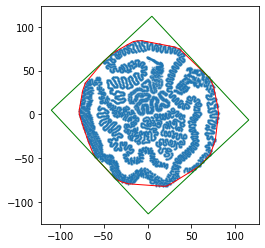

In [70]:
it.fit(X_train, y=y_train, plot=True)
X_train_img = it.transform(X_train_norm)
X_test_img = it.transform(X_test_norm)

In [221]:
import matplotlib.pyplot as plt
X_train_img[0].shape

(128, 128, 3)

In [199]:
from PIL import Image as im
import numpy as np
im = im.fromarray((X_train_img[0]* 255).astype(np.uint8))
image = np.array(im)
print(im.mode) 

RGB


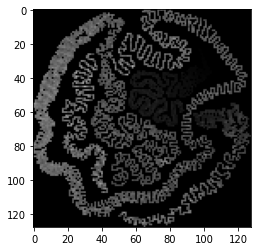

In [200]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

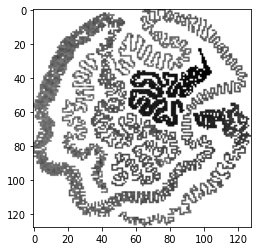

In [238]:
height, width, _ = image.shape
for i in range(height):
    for j in range(width):
        if image[i, j].sum() == 0:
            image[i, j] = [255, 255, 255]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [210]:
data.shape

(128, 128, 3)

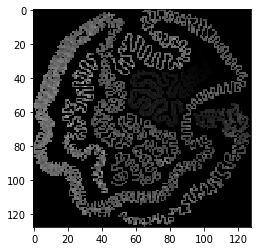

In [154]:
plt.imshow(X_train_img[0], interpolation='nearest')

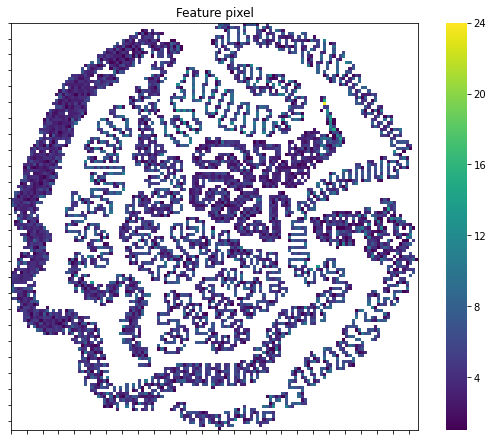

In [88]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7.5))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0., 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Feature pixel")

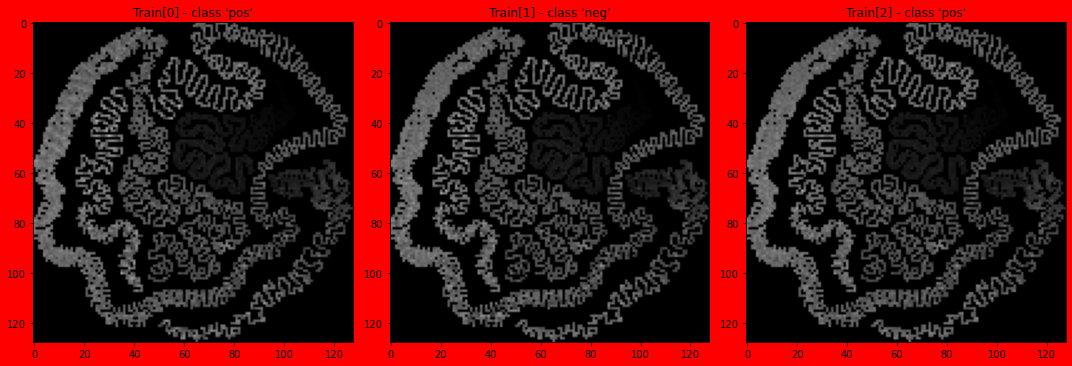

In [141]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0,3):
    ax[i].imshow(X_train_img[i],cmap="viridis")
    fig.set_facecolor("red")
    ax[i].title.set_text(f"Train[{i}] - class '{y_train[i]}'")
plt.tight_layout()

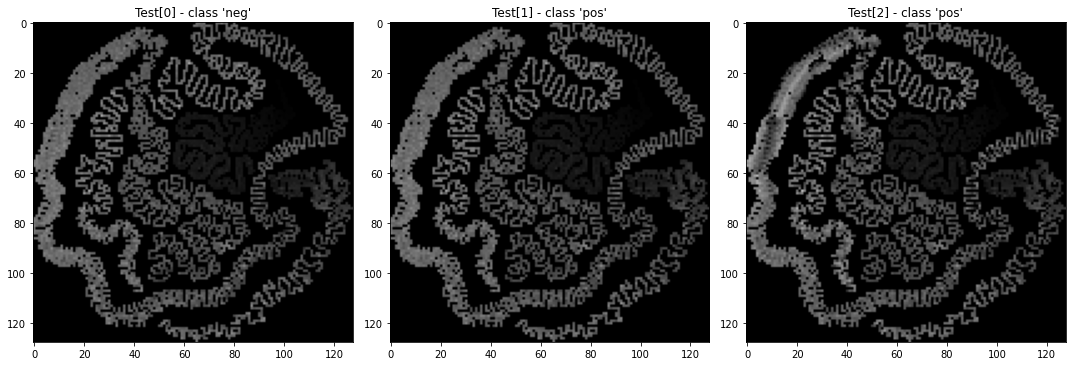

In [103]:
X_test_img = it.transform(X_test_norm)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0,3):
    ax[i].imshow(X_test_img[i])
    ax[i].title.set_text(f"Test[{i}] - class '{y_test[i]}'")
plt.tight_layout()

In [104]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import accuracy_score

import warnings; 
warnings.simplefilter('ignore')

In [105]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [126]:
net = torch.hub.load(
    'pytorch/vision:v0.10.0', 'squeezenet1_1', 
    pretrained=True, verbose=False)
net.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), 
                              stride=(1,1))
net = net.to(device)

In [127]:
preprocess = transforms.Compose([
    transforms.ToTensor()
])

In [128]:
X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float().to(device)
y_train_tensor = torch.from_numpy(le.fit_transform(y_train)).to(device)

X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float().to(device)
y_test_tensor = torch.from_numpy(le.transform(y_test)).to(device)

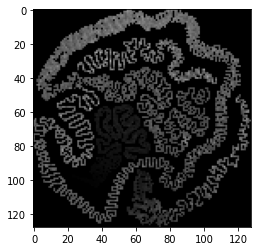

In [129]:
pic = X_train_tensor[0].cpu().transpose(0,2)
plt.imshow(pic)

In [130]:
batch_size = 50

trainset = TensorDataset(X_train_tensor, y_train_tensor)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = TensorDataset(X_test_tensor, y_test_tensor)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [131]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    net.parameters(),
    lr=1e-04,
    momentum=0.8,
    weight_decay=1e-05
)

In [132]:
for epoch in range(200):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = labels.type(torch.LongTensor)   # casting to long
        
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print epoch statistics
    if not (epoch % 20):
        print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')
print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')

[0] loss: 0.937
[20] loss: 0.701
[40] loss: 0.690
[60] loss: 0.658
[80] loss: 0.615
[100] loss: 0.560
[120] loss: 0.537
[140] loss: 0.481
[160] loss: 0.480
[180] loss: 0.452
[199] loss: 0.403


In [133]:
train_predicted = np.empty(0)
train_true = np.empty(0)
with torch.no_grad():
    net.eval()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
        train_predicted = np.append(train_predicted, pred)
        train_true = np.append(train_true, labels.cpu().detach().numpy())

In [134]:
test_predicted = np.empty(0)
test_true = np.empty(0)
with torch.no_grad():
    net.eval()
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
        test_predicted = np.append(test_predicted, pred)
        test_true = np.append(test_true, labels.cpu().detach().numpy())


In [135]:
print(f"The train accuracy was {accuracy_score(train_predicted, train_true):.3f}")
print(f"The test accuracy was {accuracy_score(test_predicted, test_true):.3f}")

The train accuracy was 0.865
The test accuracy was 0.841


In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_true, test_predicted)
cm

array([[146,  14],
       [ 37, 123]], dtype=int64)

<AxesSubplot:>

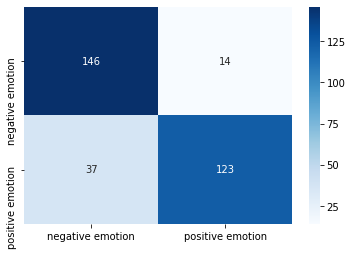

In [137]:
import seaborn as sns

cm_df = pd.DataFrame(cm, index=['negative emotion' , 'positive emotion'], columns=['negative emotion' , 'positive emotion'])
sns.heatmap(cm_df, annot=True, 
            fmt='', cmap='Blues')


In [138]:
accuracy=accuracy_score(y_true=test_true, y_pred=test_predicted)
print("Logistic-Accuracy: {:.2f}%".format(accuracy*100))
from sklearn.metrics import classification_report
print(classification_report(test_true,test_predicted))
print()

Logistic-Accuracy: 84.06%
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       160
         1.0       0.90      0.77      0.83       160

    accuracy                           0.84       320
   macro avg       0.85      0.84      0.84       320
weighted avg       0.85      0.84      0.84       320




In [139]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
cm.diagonal()*100

array([91.25 , 76.875])

Text(0.5, 1.0, 'accuracy of each class')

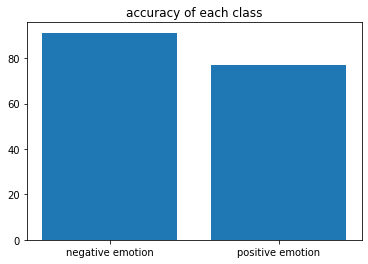

In [140]:
plt.bar(['negative emotion' , 'positive emotion'],cm.diagonal()*100)
plt.xticks(rotation=0)
plt.title("accuracy of each class")